In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join('../..', 'src')))
sys.setrecursionlimit(20500)
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import clean_dataset as clean
import make_dataset as mk
import vectorize_embed as em
import tools as tools
import models as m

import pickle
import numpy as np

'''features'''
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize

'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline

'''Metrics/Evaluation'''
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

import joblib
import seaborn as sns

[nltk_data] Downloading package stopwords to C:\Users\Jonas
[nltk_data]     Nothnagel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jonas
[nltk_data]     Nothnagel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jonas
[nltk_data]     Nothnagel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jonas
[nltk_data]     Nothnagel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
'''import data'''

df = pd.read_csv(os.path.abspath(os.path.join('../..', 'data/processed/encoded_labels'))+'/_conventions_protocols_plans.csv')  
'''lowercase data and str type data'''
df['all_text_clean_spacy'] = df['all_text_clean_spacy'].astype(str).apply(clean.basic)
df['all_text_clean'] = df['all_text_clean'].astype(str)

In [3]:
print(df.shape)
print(df.columns)

(576, 26)
Index(['PIMS_ID', 'all_text_clean', 'all_text_clean_spacy',
       '_conventions_protocols_plans',
       'cartagena_protocol_on_biosafety_lmos_gmos',
       'convention_on_biological_diversity_cbd',
       'international_maritime_organization_conventions_ime',
       'lme_conventions', 'minamata_convention_on_mercury',
       'montreal_protocols', 'multi_national_plans', 'nagoya_protocol_abs',
       'national_action_plan', 'national_adaptation_plan_nap',
       'national_biodiversity_strategies_and_action_plans_nbsaps',
       'national_communications', 'national_determined_contributions_ndcs',
       'national_development_policies', 'no tag', 'other_global_conventions',
       'regional_seas_conventions_and_action_plans',
       'stockholm_convention_pops', 'strategic_action_programme',
       'the_convention_on_international_trade_in_endangered_species_of_wild_fauna_and_flora_cites',
       'united_nations_convention_to_combat_desertification_unccd',
       'united_nation

In [4]:
df.columns.tolist()

['PIMS_ID',
 'all_text_clean',
 'all_text_clean_spacy',
 '_conventions_protocols_plans',
 'cartagena_protocol_on_biosafety_lmos_gmos',
 'convention_on_biological_diversity_cbd',
 'international_maritime_organization_conventions_ime',
 'lme_conventions',
 'minamata_convention_on_mercury',
 'montreal_protocols',
 'multi_national_plans',
 'nagoya_protocol_abs',
 'national_action_plan',
 'national_adaptation_plan_nap',
 'national_biodiversity_strategies_and_action_plans_nbsaps',
 'national_communications',
 'national_determined_contributions_ndcs',
 'national_development_policies',
 'no tag',
 'other_global_conventions',
 'regional_seas_conventions_and_action_plans',
 'stockholm_convention_pops',
 'strategic_action_programme',
 'the_convention_on_international_trade_in_endangered_species_of_wild_fauna_and_flora_cites',
 'united_nations_convention_to_combat_desertification_unccd',
 'united_nations_framework_convention_on_climate_change_unfccc']

<AxesSubplot:>

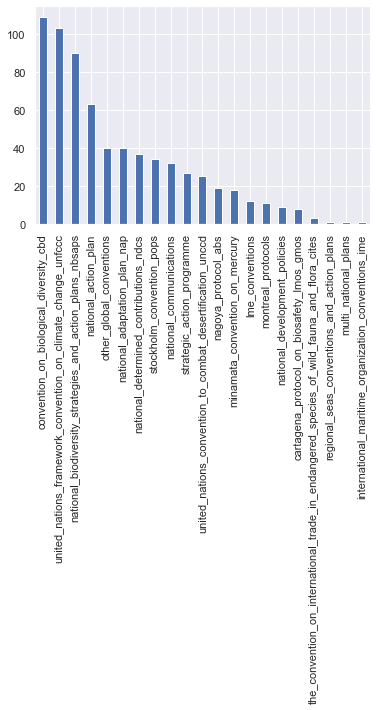

In [5]:
df[['cartagena_protocol_on_biosafety_lmos_gmos',
 'convention_on_biological_diversity_cbd',
 'international_maritime_organization_conventions_ime',
 'lme_conventions',
 'minamata_convention_on_mercury',
 'montreal_protocols',
 'multi_national_plans',
 'nagoya_protocol_abs',
 'national_action_plan',
 'national_adaptation_plan_nap',
 'national_biodiversity_strategies_and_action_plans_nbsaps',
 'national_communications',
 'national_determined_contributions_ndcs',
 'national_development_policies',
 'other_global_conventions',
 'regional_seas_conventions_and_action_plans',
 'stockholm_convention_pops',
 'strategic_action_programme',
 'the_convention_on_international_trade_in_endangered_species_of_wild_fauna_and_flora_cites',
 'united_nations_convention_to_combat_desertification_unccd',
 'united_nations_framework_convention_on_climate_change_unfccc']].sum(axis=0).sort_values(ascending = False).plot.bar()

In [6]:
categories =['cartagena_protocol_on_biosafety_lmos_gmos',
 'convention_on_biological_diversity_cbd',
 'lme_conventions',
 'minamata_convention_on_mercury',
 'montreal_protocols',
 'nagoya_protocol_abs',
 'national_action_plan',
 'national_adaptation_plan_nap',
 'national_biodiversity_strategies_and_action_plans_nbsaps',
 'national_communications',
 'national_determined_contributions_ndcs',
 'national_development_policies',
 'other_global_conventions',
 'stockholm_convention_pops',
 'strategic_action_programme',
 'united_nations_convention_to_combat_desertification_unccd',
 'united_nations_framework_convention_on_climate_change_unfccc']

remove = [ 'no tag', 'the_convention_on_international_trade_in_endangered_species_of_wild_fauna_and_flora_cites',
          'regional_seas_conventions_and_action_plans', 'multi_national_plans', 'international_maritime_organization_conventions_ime']

In [8]:
# iterate over categories and save best models:
    #Creating a dict of the models
model_dict = {
              'Logistic Regression balanced' : LogisticRegression(random_state = 3, class_weight = "balanced"),
              'Logistic Regression' : LogisticRegression(random_state = 3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Stochastic Gradient Descent balanceed' : SGDClassifier(random_state=3, loss='log',class_weight = "balanced" ),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()}
    
for category in categories: 
    
    print('processing:', category)
    print('_____')
    #Creating the features (tf-idf weights) for the processed text
    texts = df['all_text_clean'].astype('str')

    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
                                       min_df = 2, 
                                       max_df = .95)
    X = tfidf_vectorizer.fit_transform(texts)     
    y = df[category].values
    
    if len(category) > 50:
         shorter = category[0:25]
         #save vectorizer:
         filename = '../../models/tf_idf/conventions_protocols/'+shorter+'_'+'vectorizer.sav'
         joblib.dump(tfidf_vectorizer, filename)    
        
    else:
        #save vectorizer:
        filename = '../../models/tf_idf/conventions_protocols/'+category+'_'+'vectorizer.sav'
        joblib.dump(tfidf_vectorizer, filename)    
        
    #Dimenionality reduction. Only using the 100 best features er category
    lsa = TruncatedSVD(n_components=100, 
                       n_iter=10, 
                       random_state=3)
    X = lsa.fit_transform(X)

    if len(category) > 50:
        print('long')
        shorter = category[0:20]
        #save lsa model:
        filename = '../../models/tf_idf/conventions_protocols/'+shorter+'_'+'lsa.sav'
        joblib.dump(lsa, filename)
    else:
        #save vectorizer:
        filename = '../../models/tf_idf/conventions_protocols/'+category+'_'+'lsa.sav'
        joblib.dump(lsa, filename)  
    
    #Train test split with stratified sampling for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = .3, 
                                                        shuffle = True, 
                                                        stratify = y, 
                                                        random_state = 3)
    
    m.model_score_df(model_dict, category, 'conventions_protocols', X_train, X_test, y_train, y_test)

processing: cartagena_protocol_on_biosafety_lmos_gmos
_____
processing: convention_on_biological_diversity_cbd
_____
processing: lme_conventions
_____
processing: minamata_convention_on_mercury
_____
processing: montreal_protocols
_____
processing: nagoya_protocol_abs
_____
processing: national_action_plan
_____
processing: national_adaptation_plan_nap
_____
processing: national_biodiversity_strategies_and_action_plans_nbsaps
_____
long
national_biodiversit
processing: national_communications
_____
processing: national_determined_contributions_ndcs
_____
processing: national_development_policies
_____
processing: other_global_conventions
_____
processing: stockholm_convention_pops
_____
processing: strategic_action_programme
_____
processing: united_nations_convention_to_combat_desertification_unccd
_____
long
united_nations_conve
processing: united_nations_framework_convention_on_climate_change_unfccc
_____
long
united_nations_frame
